# Imports

In [1]:
import os
import sys
sys.path.append(os.path.sep.join(os.getcwd().split(sep=os.path.sep)[:-1]))

import PlotTools

import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

In [2]:
import importlib
importlib.reload(PlotTools)

<module 'PlotTools' from 'D:\\Liel\\Dropbox\\PyCharm\\PycharmProjectsNew\\LielTools_4\\LielTools\\PlotTools.py'>

# Load data

### Iris df

In [3]:
iris_df = sns.load_dataset('iris')
# make some missing values
to_none = random.sample(range(0,150), 50)
iris_df.loc[to_none, 'sepal_width'] = None
iris_df.loc[to_none, 'petal_width'] = None

# show df
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,NaN,1.4,NaN,setosa
1,4.9,NaN,1.4,NaN,setosa
2,4.7,NaN,1.3,NaN,setosa
3,4.6,NaN,1.5,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,NaN,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Diamonds df

In [4]:
diam_df = sns.load_dataset('diamonds')
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Penguins df

In [5]:
peng_df = sns.load_dataset('penguins')
peng_df.drop(index=[3,339], inplace=True)
peng_df['bill_length-depth ratio'] = peng_df['bill_length_mm'] / peng_df['bill_depth_mm']
peng_df['flipper_length body_mass ratio'] = peng_df['flipper_length_mm'] / peng_df['body_mass_g']
peng_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length-depth ratio,flipper_length body_mass ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2.090909,0.048267
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2.270115,0.048947
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2.238889,0.060000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.901554,0.055942
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.907767,0.052055
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,3.445255,0.043452
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,3.272727,0.044330
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,3.210191,0.038609
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,3.054054,0.040769


# Distribution plots for multiple variables

In [6]:
help(PlotTools.plot_columns_dist)

Help on function plot_columns_dist in module PlotTools:

plot_columns_dist(df, output_file_path=None, fig_rows=4, fig_cols=5, figsize=(30, 20), kde_color='black', hist_color='g', hist_alpha=0.3, title='', title_fontsize=18, title_y=1.03, bins=30, rug=False, rug_color='black', rug_alpha=0.3, rug_linewidth=1, rug_height=0.03, font_scale=1, sns_style='ticks', x_rotation=0)
    Plot a grid of distribution plots - one for each column of a given pandas.Dataframe.
    
    @param df: pd.Dataframes with columns to be plotted (columns must be numeric)
    @param output_file_path: str. full file path for saving the plot to file system. Default None.
    @param fig_rows: int. Number of rows for the distplots grid. Default 4.
    @param fig_cols: int. Number of columns for the distplots grid. Default 5.
    @param figsize:
    @param kde_color:
    @param hist_color:
    @param hist_alpha:
    @param title:
    @param title_fontsize:
    @param title_y:
    @param bins:
    @param rug: boolean. Wh

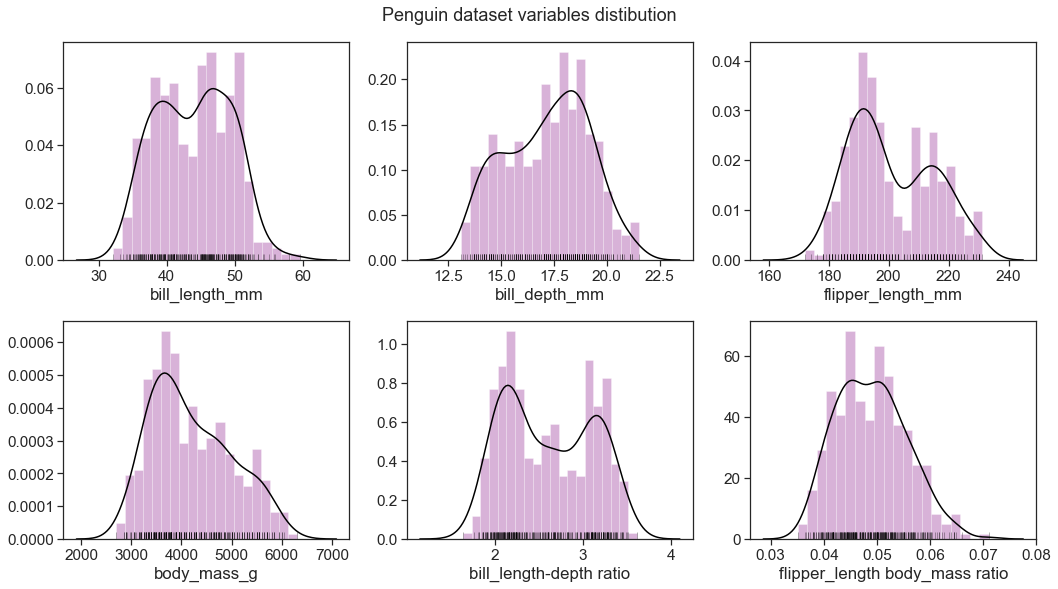

In [7]:
fig = PlotTools.plot_columns_dist(peng_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 
                                 'bill_length-depth ratio', 'flipper_length body_mass ratio']], 
                                  fig_rows=2, fig_cols=3, figsize=(15, 8), 
                                  bins=20, font_scale=1.4,
                                  kde_color='black', hist_color='purple', hist_alpha=0.3,
                                  title='Penguin dataset variables distibution', title_fontsize=18, title_y=1.03,
                                  rug=True, rug_color='black', rug_alpha=0.3, rug_linewidth=1, rug_height=0.03, 
                                  output_file_path=None)

### With categories (hue)

In [8]:
help(PlotTools.plot_columns_dist_hue)

Help on function plot_columns_dist_hue in module PlotTools:

plot_columns_dist_hue(df, hue_col, output_file_path=None, fig_cols=5, hist_alpha=0.5, shade=False, palette='Set1', sharex=False, sharey=False, font_scale=1.5, rug=False, rug_color='black', rug_alpha=0.3, rug_linewidth=1, rug_height=0.03, fig_height=3, fig_aspect=1, sns_style='ticks')
    Plot a grid of distribution plots with hue - one for each column of a given pandas.Dataframe.
    
    @param df: pd.Dataframes. All columns except for hue_col will be plotted.
                              Columns (other than hue_col) must be numeric.
    @param hue_col: str. The name of the column (from df) to be used as hue.
                         Must be a categorical/discrete values column.
    @param output_file_path: str. full file path for saving the plot to file system. Default None.
    @param fig_cols: int. Number of columns for the distplots grid. Default 5.
    @param hist_alpha:
    @param shade:
    @param palette:
    @param

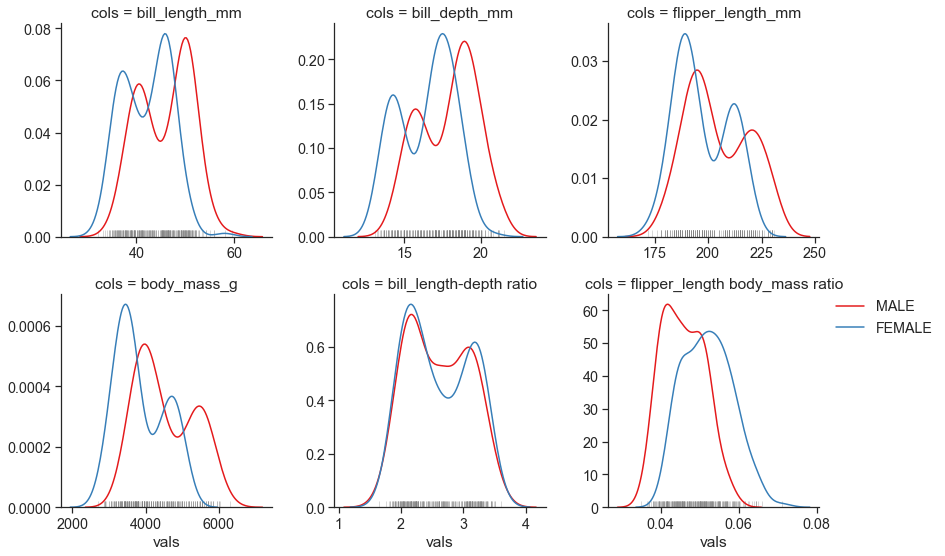

In [48]:
PlotTools.plot_columns_dist_hue(peng_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 
                                         'bill_length-depth ratio', 'flipper_length body_mass ratio', 'sex']], 
                                'sex', fig_cols=3, fig_height=4, fig_aspect=1,
                                hist_alpha=0.5, shade=False, font_scale=1.3, palette="Set1", 
                                sharex=False, sharey=False,
                                rug=True, rug_color='grey', rug_alpha=0.3,
                                rug_linewidth=1, rug_height=0.03,
                                output_file_path=None)

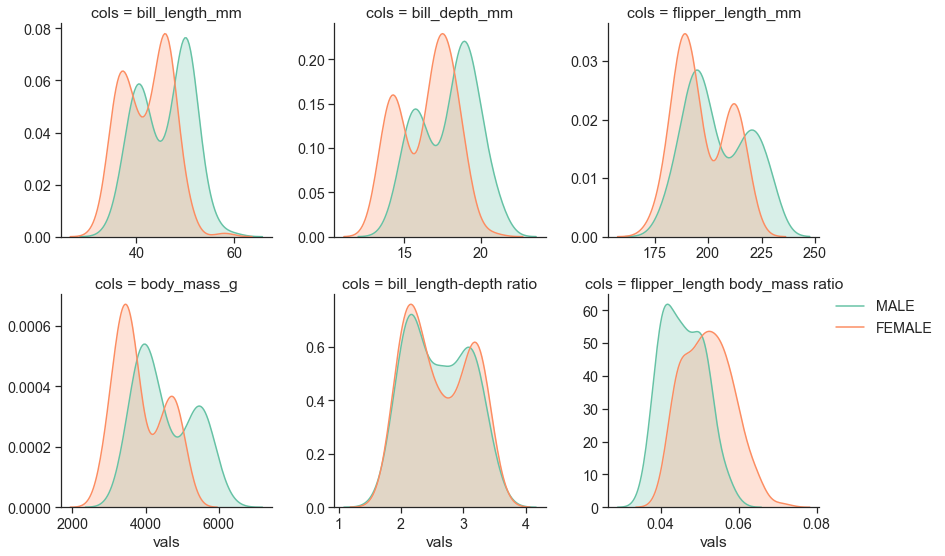

In [10]:
PlotTools.plot_columns_dist_hue(peng_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 
                                         'bill_length-depth ratio', 'flipper_length body_mass ratio', 'sex']], 
                                'sex', fig_cols=3, fig_height=4, fig_aspect=1,
                                hist_alpha=0.5, shade=True, palette="Set2", font_scale=1.3, 
                                rug=False, sharex=False, sharey=False,
                                output_file_path=None)

# Boxplot

In [11]:
help(PlotTools.plot_boxplot)

Help on function plot_boxplot in module PlotTools:

plot_boxplot(seriesX, seriesY, seriesHue=None, stripplot=True, boxplot=True, ax=None, order=None, palette=None, figsize=(7, 6), showfliers=False, plotTitle='', xTitle='', yTitle='', xRotation=45, titleFontSize=18, titleColor='maroon', legendTitle='', font_scale=1, snsStyle='ticks', boxTransparency=0.6, jitter=0.15, stripplot_alpha=0.7, stripplot_size=4, stripplot_color=None, linewidth=0, stripplot_palette=None, xy_title_fontsize=None, boxplot_color=None, add_mean=False, mean_marker='_', mean_color='red', mean_size=100, mean_linewidth=3, mean_alpha=1, add_gmean=False, gmean_marker='_', gmean_color='blue', gmean_size=100, gmean_linewidth=3, gmean_alpha=1, color_indices=None, color_indices_color='red', color_indices_size=20, color_indices_linewidth=0, color_indices_alpha=1, color_indices_marker='o', hide_indices_in_stripplot=None, horizontal=False, saveFolder=None, save_path=None, dpi=300)
    Function for plotting a boxplot and a stripp

#### Boxplot with data points (stripplot)

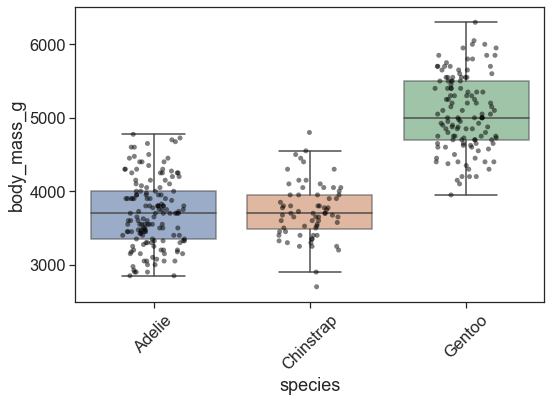

In [12]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                       peng_df["body_mass_g"], # y values series
                       figsize=(8, 6), font_scale=1.5, jitter=0.2,
                       stripplot_size=5, stripplot_alpha=0.5)

#### Boxplot with data points (stripplot) + mean + change x order + different styling

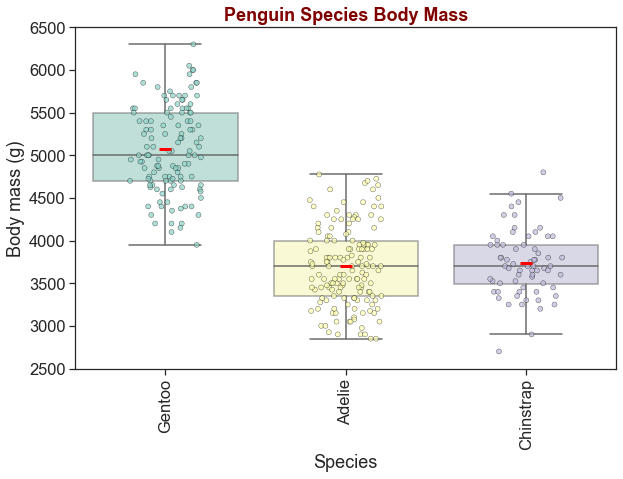

In [13]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                     peng_df["body_mass_g"], # y values series
                     figsize=(9, 7), palette='Set3',
                     plotTitle='Penguin Species Body Mass', 
                     xTitle='Species', 
                     yTitle='Body mass (g)',
                     xRotation=90, 
                     font_scale=1.5,
                     order=['Gentoo', 'Adelie', 'Chinstrap'], 
                     linewidth=0.4, jitter=0.2,
                     stripplot_size=5, 
                     add_mean=True,
                     mean_size=150)

#### Only stripplot + mean (& different styling)

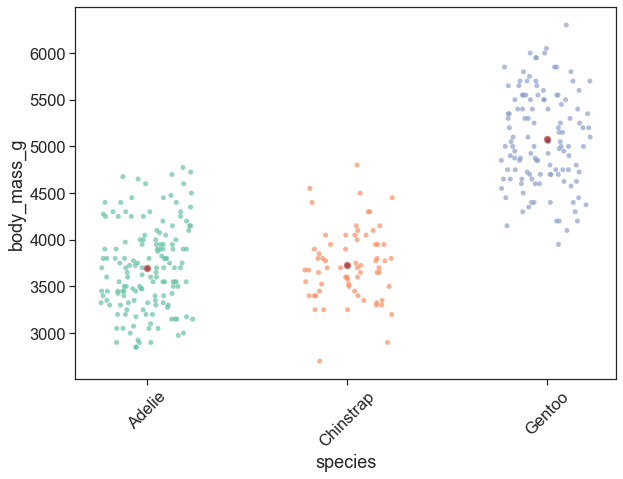

In [14]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                     peng_df["body_mass_g"], # y values series
                     figsize=(9, 7), boxplot=False,
                     jitter=0.23, stripplot_size=5, stripplot_palette='Set2',
                     font_scale=1.5,
                     add_mean=True, mean_marker='o', mean_color='darkred', 
                     mean_alpha=0.5, mean_size=20)

#### Boxplot with data points (stripplot) + hue (category)
*add_mean is currently not working with hue.

D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


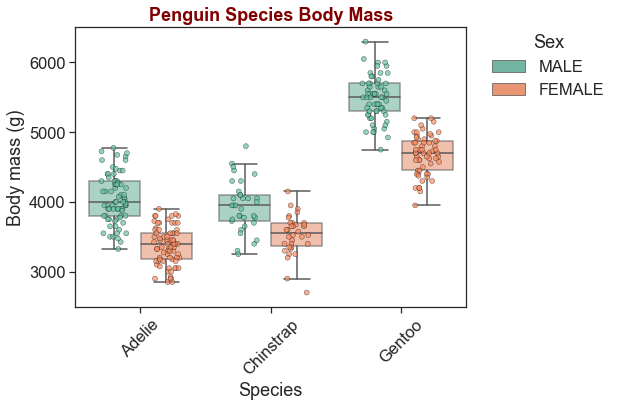

In [49]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                     peng_df["body_mass_g"], # y values series
                     seriesHue=peng_df["sex"],
                     figsize=(9, 6), palette='Set2',
                     plotTitle='Penguin Species Body Mass', 
                     xTitle='Species', yTitle='Body mass (g)', legendTitle='Sex',
                     font_scale=1.5, jitter=0.2,
                     stripplot_size=5, linewidth=0.4)

#### Coloring specific markers by dataframe indices

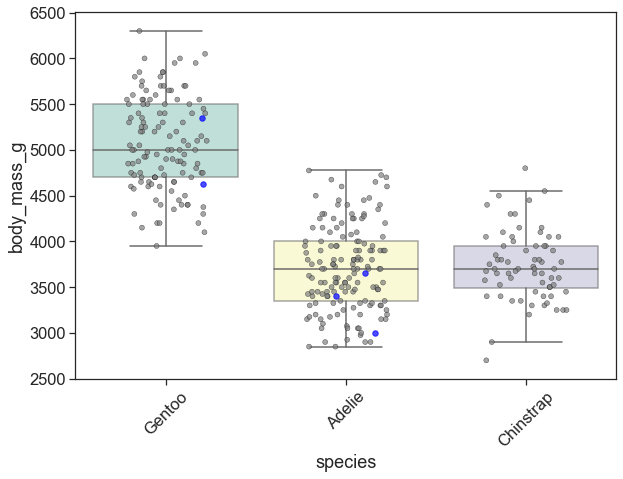

In [60]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             figsize=(9, 7), font_scale=1.5, palette='Set3',
             stripplot_size=5, stripplot_color='grey', linewidth=0.4,     
             order=['Gentoo', 'Adelie', 'Chinstrap'], jitter=0.23, 
             color_indices=[5, 20, 44, 300, 303], color_indices_color='blue',
             color_indices_size=30, color_indices_linewidth=1, color_indices_alpha=0.7, color_indices_marker='o'
             )

# Boxplot with statistical testing and annotation
Please make sure to choose the relevant statistical test!
Details bellow and in function documentation.
  * The Mann-Whitney U test is the nonparametric equivalent of the two sample t-test
  * the Mann-Whitney U-test tests two independent samples, whereas the Wilcox sign test tests two dependent samples.

In [17]:
help(PlotTools.plot_boxplot_hue_stats_text)

Help on function plot_boxplot_hue_stats_text in module PlotTools:

plot_boxplot_hue_stats_text(df, x_col_name, y_col_name, hue_col_name, test='Mann-Whitney', comparisons_correction=None, stats_loc='inside', stats_line_offset=None, stats_line_height=0.02, stats_text_offset=1, stats_linewidth=1.5, stats_fontsize='medium', stats_width=0.8, **boxplot_kwargs)
    Draws a boxplot using the plot_boxplot function. Then, performs statistical test
    between "hue" col values (must be 2-values only), and adds statistical annotation on top
    of the boxes.
    
    @param df: pandas dataframe
    @param x_col_name: str. name of df column to be plotted on x axis (categorical)
    @param y_col_name: str. name of df column to be plotted on y axis (numeric)
    @param hue_col_name: str. name of df column to be plotted as hue. can only contain exactly 2 unique values (categories).
                              the statistical test will be performed between these two categories, against the y values.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Chinstrap_MALE v.s. Chinstrap_FEMALE: Mann-Whitney-Wilcoxon test two-sided, P_val=5.261e-06 U_stat=9.495e+02
Adelie_MALE v.s. Adelie_FEMALE: Mann-Whitney-Wilcoxon test two-sided, P_val=3.091e-20 U_stat=5.018e+03
Gentoo_MALE v.s. Gentoo_FEMALE: Mann-Whitney-Wilcoxon test two-sided, P_val=2.159e-19 U_stat=3.462e+03


D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


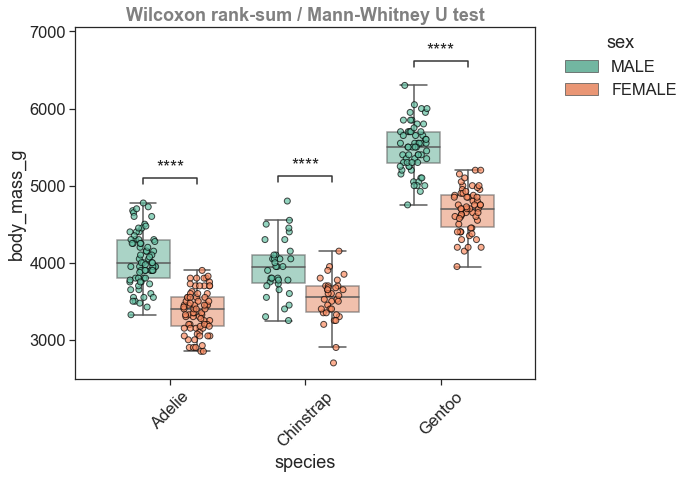

In [61]:
# statannot must be installed prior to using this function: ** pip install git+https://github.com/webermarcolivier/statannot.git
PlotTools.plot_boxplot_hue_stats_text(peng_df.loc[peng_df['sex'].notna()], 
                                      x_col_name='species', y_col_name='body_mass_g', hue_col_name='sex',
                                      test='Mann-Whitney', comparisons_correction=None,
                                      stats_loc='inside', stats_line_offset=None, stats_line_height=0.02,
                                      stats_text_offset=1, stats_linewidth=1.5,
                                      stats_fontsize='medium', stats_width=0.8,
                                      # boxplot_kwargs
                                      figsize=(10,7), font_scale=1.5, palette='Set2', stripplot_size=6, linewidth=1,
                                      plotTitle='Wilcoxon rank-sum / Mann-Whitney U test', titleColor='grey', jitter=0.2)

# Multiple Boxplots
 A panel of boxplots - one for each of given y columns.

In [19]:
help(PlotTools.plot_boxplot_subplots)

Help on function plot_boxplot_subplots in module PlotTools:

plot_boxplot_subplots(df, x_col, y_cols, hue_col=None, output_file_path=None, fig_rows=4, fig_cols=5, figsize=(30, 20), title='', title_fontsize=18, title_y=1.03, font_scale=1, sns_style='ticks', **boxplot_kwargs)
    @param df: pd.DataFrame containing the data for the figures.
    @param x_col: str. The name of the df column to plot in the x axis of all subplots.
    @param y_cols: list of strings. A list that contains the names of all columns to be plotted from df.
                   Each column will be plotted in a boxplot of its own (a single subplot).
    @param hue_col: str. The name of the df column to plot as the hue variable (i.e., sub-categories) of all subplots. Default None.
    @param output_file_path: str. path for the figure to be saved to file system. Default None.
    @param fig_rows: int. Number of subplots rows.
    @param fig_cols: int. Number of subplots columns.
    @param figsize: tuple with 2 numbers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014058E5CA88>,
      dtype=object)

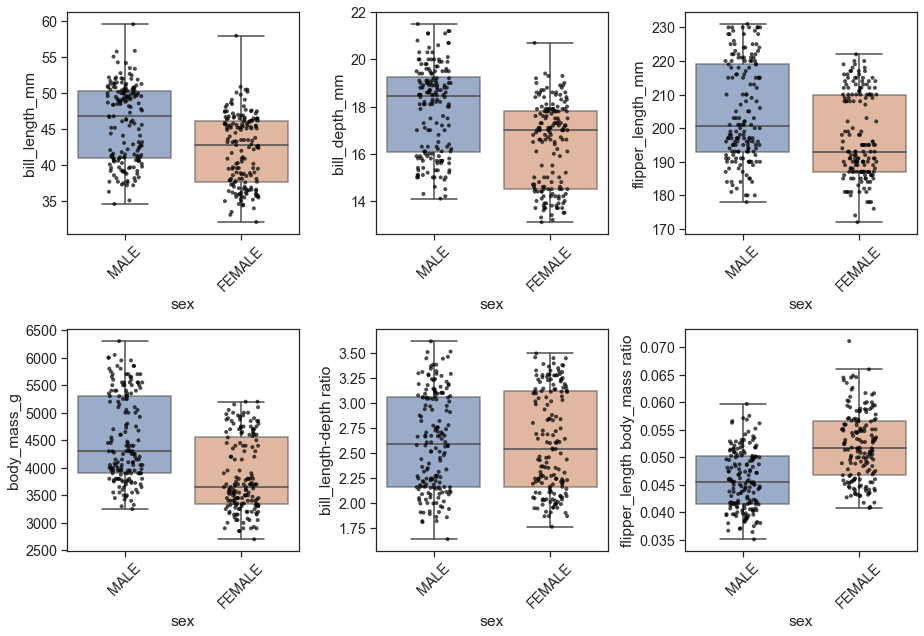

In [66]:
PlotTools.plot_boxplot_subplots(peng_df.loc[peng_df['sex'].notna()], x_col='sex', 
                                y_cols=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'bill_length-depth ratio', 'flipper_length body_mass ratio'], 
                                hue_col=None, fig_rows=2, fig_cols=3, figsize=(13, 9),
                                title='', title_fontsize=18, title_y=1.03, font_scale=1.3,
                                output_file_path=None)

D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodg

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014059650048>,
      dtype=object)

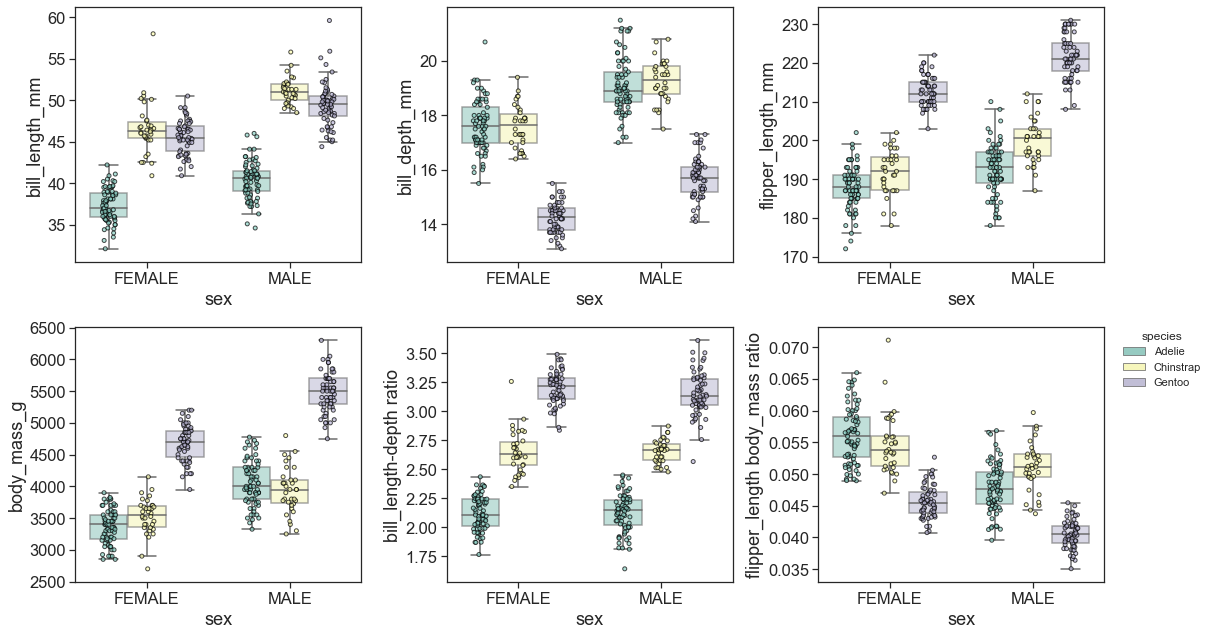

In [67]:
PlotTools.plot_boxplot_subplots(peng_df.loc[peng_df['sex'].notna()], 
                                'sex', 
                                ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'bill_length-depth ratio', 'flipper_length body_mass ratio'], 
                                hue_col='species', fig_rows=2, fig_cols=3, figsize=(17, 9),
                                order=['FEMALE', 'MALE'], 
                                font_scale=1.5, palette='Set3', 
                                linewidth=1, xRotation=0,
                                output_file_path=None) 

# Violin Boxplot

In [22]:
help(PlotTools.plot_violin_boxplot)

Help on function plot_violin_boxplot in module PlotTools:

plot_violin_boxplot(df, x, y, cut_in_half=True, stripplot=True, figsize=(6, 5), xtitle=None, ytitle=None, palette='Set1', jitter=0.05, dot_size=4, dot_color='grey', violin_alpha=0.8, stripplot_alpha=0.3, boxplot_width=0.3, dots_x_offset=0.002, order=None, x_rotation=0, xy_title_fontsize=12, font_scale=1, violin_cut=2)
    Plot a violin plot with a boxplot and stripplot on top.
    
    :param df: pandas Dataframe from to plot data from
    :param x: string. x variable - column name from df
    :param y: string. y variable (numeric) - column name from df
    :param cut_in_half: boolean. cut violin plot in half such that stripplot
                        dots will be visible
    :param stripplot: boolean. add stripplot
    :param figsize: tuple of 2 numbers, default (6, 5)
    :param xtitle: x axis title. Default is None, then uses x column name
    :param ytitle: y axis title. Default is None, then uses x column name
    :param 

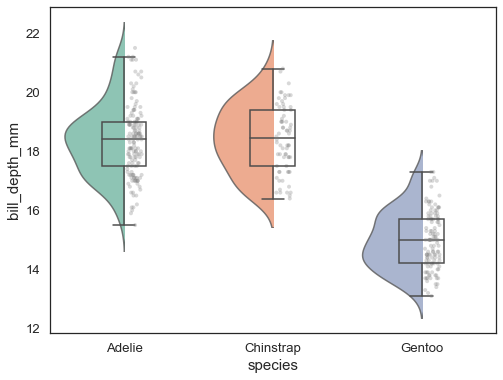

In [23]:
PlotTools.plot_violin_boxplot(peng_df, 'species', 'bill_depth_mm', 
                              figsize=(8,6), palette='Set2', 
                              font_scale=1.2, xy_title_fontsize=15)

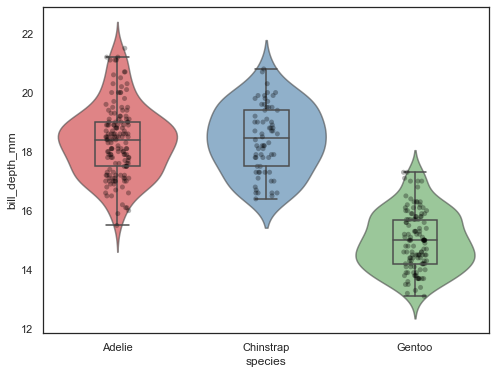

In [24]:
PlotTools.plot_violin_boxplot(peng_df, 'species', 'bill_depth_mm', 
                    figsize=(8,6), cut_in_half=False, stripplot=True,
                    palette='Set1', jitter=0.08, dot_size=5,
                    dot_color='black', violin_alpha=0.6,
                    dots_x_offset=0.002)

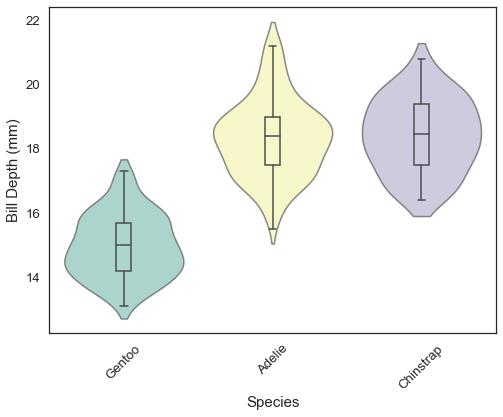

In [25]:
PlotTools.plot_violin_boxplot(peng_df, 'species', 'bill_depth_mm', 
                    figsize=(8,6), cut_in_half=False, stripplot=False,
                    xtitle='Species', ytitle='Bill Depth (mm)',
                    palette='Set3', jitter=0.1, dot_size=5,
                    violin_alpha=0.8, boxplot_width=0.1,
                    order=['Gentoo', 'Adelie', 'Chinstrap'], 
                    x_rotation=45, violin_cut=1,
                    xy_title_fontsize=15, font_scale=1.2)

# Parallel coordinates plots

##### Consider that in parallel coordinates plots, the order of the variables has gread affect over the appearance of the plot and data.

### spaghetti_patients function

In [26]:
help(PlotTools.spaghetti_patients)

Help on function spaghetti_patients in module PlotTools:

spaghetti_patients(patientDf, classColumn=None, figsize=(6, 8), linewidth=1, alpha=0.9, rotationXlabels=90, plotTitle=None, xTitle=None, yTitle=None, ylim=None, showLegend=True, saveFullPath=None, marker='', markersize=2, legend_title='', shuffle_colors=True, cmap=None)
    Gets a df. Creates a spaghetti plot with each row getting a line,
    and each column getting an x-axis point.
    
    @ patientDf: This is the only obligatory variable.
            Must contain all numeric columns (except for "classColumn")
    @ classColumn: string. Not obligatory. The name of a column of "class"
        values (can be strings / numeric column).
        Each row will be colored according to classColumn's values.
        (This column will not be used for an x-axis point)
        If classColumn=None, each row will get a different color.
    @ showLegend -  will work only if "classColumn" is given.
    @ alpha - transparency.
    @ showFig = 

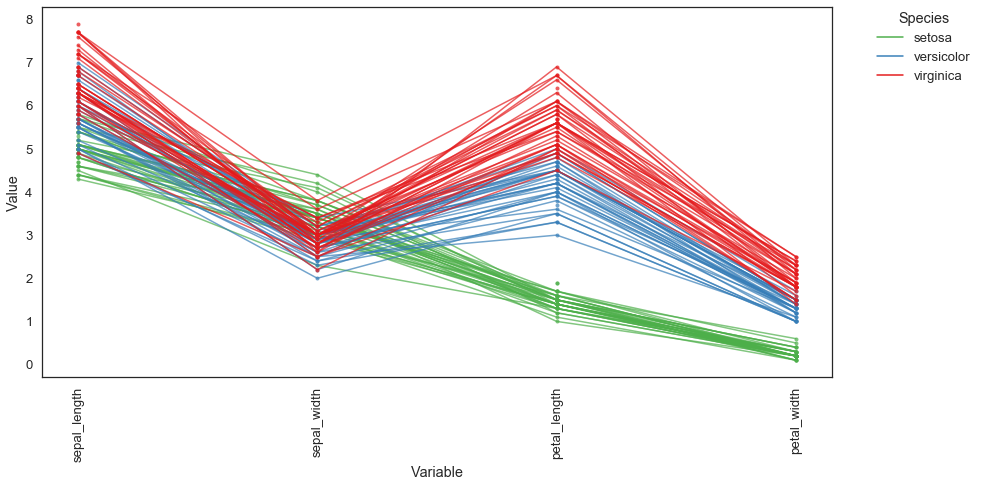

In [27]:
fig = PlotTools.spaghetti_patients(iris_df, classColumn='species', figsize=(14,7),
                       linewidth=1.5, alpha=0.7, rotationXlabels=90,
                       plotTitle=None, xTitle='Variable', yTitle='Value',
                       ylim=None, showLegend=True, saveFullPath=None,
                       marker='o', markersize=4, legend_title='Species',
                       cmap='Set1', shuffle_colors=False)

### parallele_coordinates_plot function

In this plot, the markers can be removed (by the plot_markers parameter). However, please notice that in such case, if there are missing values, they might not be shown (depending on whether the sample has values for the surrounding variables or not).

In [28]:
help(PlotTools.parallele_coordinates_plot)

Help on function parallele_coordinates_plot in module PlotTools:

parallele_coordinates_plot(df, class_column=None, cmap='Set1', figsize=(8, 5), x_title='', y_title='', axis_title_fontsize=13, plot_markers=True, marker_size=25, marker_type='o', marker_alpha=0.7, marker_linewidth=0, line_alpha=0.7, legend_title='', legend_frameon=False, xticks_rotation=0, y_gridlines=True)
    Plots a parallele coordinates plot from a pandas.DataFrame columns.
    Class column, if given, will be used to color the lines according to the class.
    Can also add markers - can be important when there are many missing data points.
    
    :param df: pandas.DataFrame. Each column will get an x axis value in the plot.
    :param class_column: string. df column name, of a column with categorical/discrete values.
                         If given, will be used to color the lines according to the class
    :param cmap: string. matplotlib cmap name. Will be used for the class column coloring
    :param figsize: t

#### Markers on

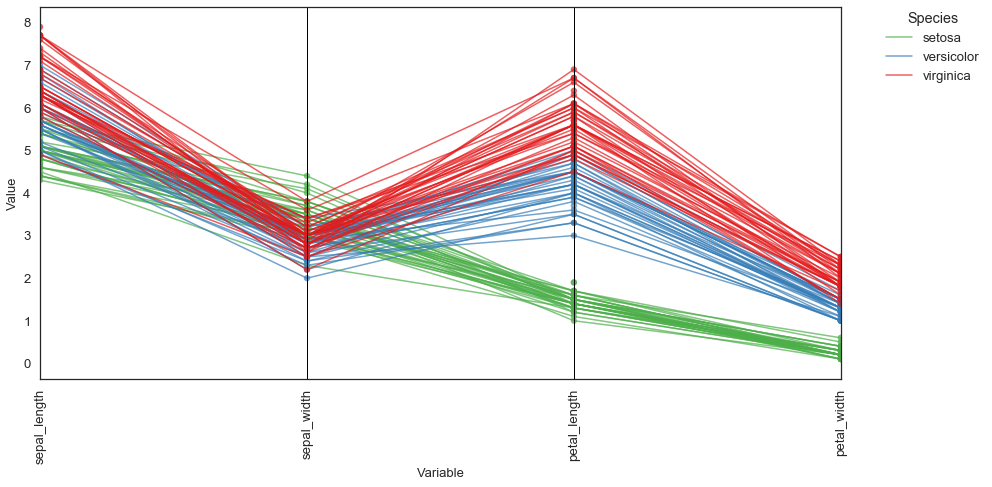

In [29]:
ax = PlotTools.parallele_coordinates_plot(iris_df, class_column='species', cmap='Set1',
                                     figsize=(14,7), x_title='Variable', y_title='Value', 
                                     axis_title_fontsize=13,
                                     plot_markers=True, marker_size=40, marker_type='o',
                                     marker_alpha=0.7, marker_linewidth=0,
                                     line_alpha=0.7, legend_title='Species',
                                     legend_frameon=False, xticks_rotation=90,
                                     y_gridlines=False)

#### Markers off 
(notice some values are not shown!)

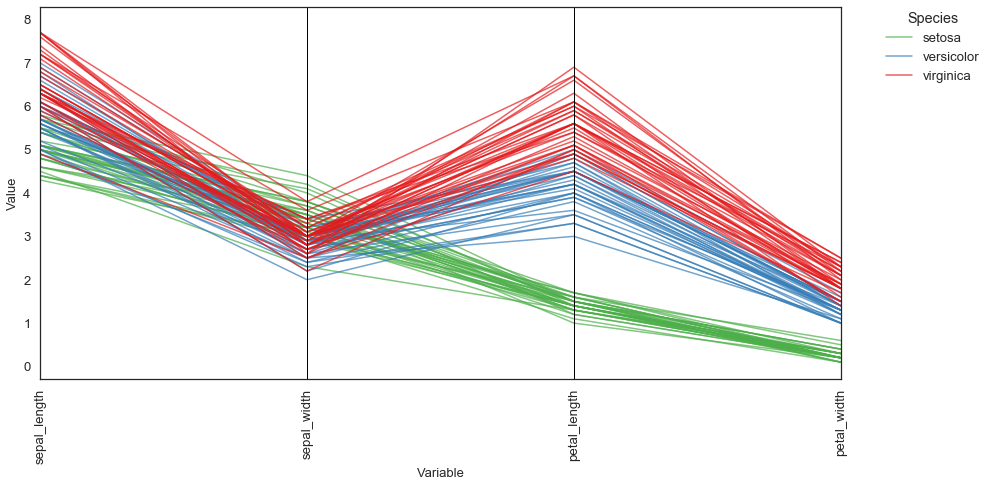

In [30]:
ax = PlotTools.parallele_coordinates_plot(iris_df, class_column='species', cmap='Set1',
                                     figsize=(14,7), x_title='Variable', y_title='Value', 
                                     axis_title_fontsize=13,
                                     plot_markers=False, marker_size=40, marker_type='o',
                                     marker_alpha=0.7, marker_linewidth=0,
                                     line_alpha=0.7, legend_title='Species',
                                     legend_frameon=False, xticks_rotation=90,
                                     y_gridlines=False)

# Scatterplot with correlation

In [31]:
help(PlotTools.plot_scatter)

Help on function plot_scatter in module PlotTools:

plot_scatter(x_series, y_series, ax=None, figsize=(6, 5), show_reg_line=True, plt_corr_txt=True, plot_pearson=True, plot_spearman=True, plot_title='', x_title='', y_title='', font_scale=1, sns_style='ticks', markers_color='teal', markers_alpha=0.6, x_rotation=45, title_font_size=18, corr_font_size=14, title_color='maroon', xticks=None, axes_title_font_size=14, x_jitter=None, y_jitter=None, ylim=None, xlim=None, correl_text_x_loc=0.2, correl_text_y_loc=0.96, save_folder=None, save_full_path=None, x_log_scale=False, y_log_scale=False)
    @param x_series: pd.Series. x values series.
    @param y_series: pd.Series. y values series.
    @param ax: matplotlib axes object to plot over. Default None
    @param figsize: tuple (length 2) with numbers indicating figure size. Default (6, 5)
    @param show_reg_line: boolean. Whether to add a regression line. Default True
    @param plt_corr_txt: boolean. Whether to add correlation text. Default 

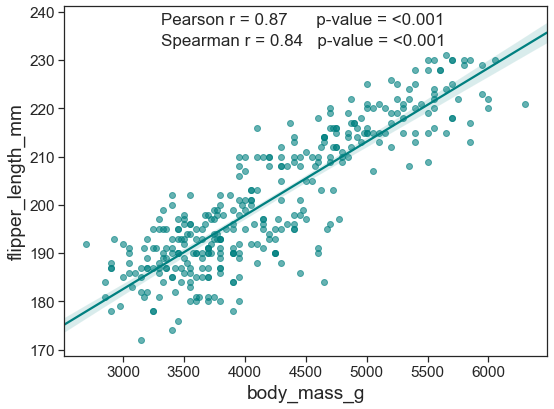

In [32]:
PlotTools.plot_scatter(peng_df["body_mass_g"], # x series
                       peng_df["flipper_length_mm"], # y series
                       figsize=(8, 6),
                       x_rotation=0, 
                       corr_font_size=17, font_scale=1.4,
                       axes_title_font_size=19,
                       correl_text_x_loc=0.2, correl_text_y_loc=0.95)

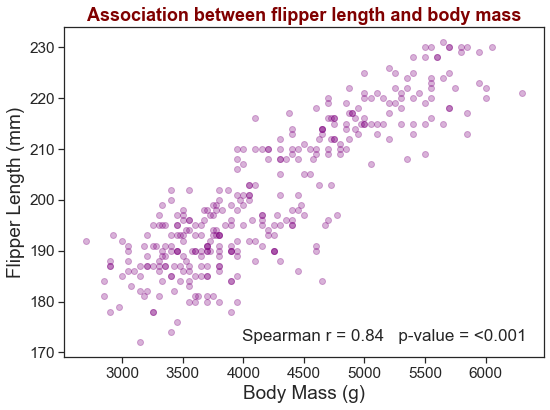

In [33]:
PlotTools.plot_scatter(peng_df["body_mass_g"], # x series
                       peng_df["flipper_length_mm"], # y series
                       figsize=(8, 6),
                       show_reg_line=False, plot_pearson=False,
                       plot_title='Association between flipper length and body mass',
                       x_title='Body Mass (g)',
                       y_title='Flipper Length (mm)',
                       markers_color='purple', markers_alpha=0.3,
                       x_rotation=0, 
                       corr_font_size=17, font_scale=1.4,
                       axes_title_font_size=19,
                       correl_text_x_loc=0.37, correl_text_y_loc=0.05)

### With a "hue" variable

In [34]:
help(PlotTools.plot_scatter_hue)

Help on function plot_scatter_hue in module PlotTools:

plot_scatter_hue(series_x, series_y, series_hue=None, save_folder=None, save_full_path=None, aspect_ratio=1.2, size=7, show_reg_line=False, plot_title='', x_title='', y_title='', x_rotation=45, titleFontSize=18, title_color='maroon', hue_legend_title='', xticks=None, font_scale=1, sns_style='ticks', legend_frame=False, hue_colorscale=False, hue_palette='Set2', marker_size=5, marker_linewidth=0, marker_edgecolor='black', marker_alpha=1, x_log_scale=False, y_log_scale=False, ylim=None, xlim=None)
    # former plotScatterHue



D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


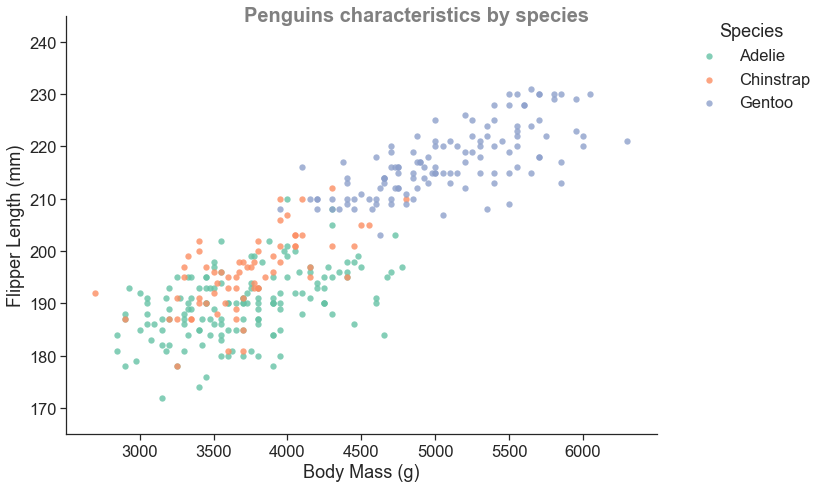

In [35]:
PlotTools.plot_scatter_hue(peng_df["body_mass_g"], # x series
                 peng_df["flipper_length_mm"], # y series, 
                 series_hue=peng_df["species"],
                 aspect_ratio=1.7, size=7,
                 x_title='Body Mass (g)', y_title='Flipper Length (mm)', x_rotation=0,
                 plot_title='Penguins characteristics by species', titleFontSize=20, title_color='grey',
                 hue_legend_title='Species', xticks=None, font_scale=1.5,
                 sns_style="ticks", legend_frame=False,
                 hue_colorscale=False, hue_palette='Set2',
                 marker_size=40,
                 marker_linewidth=0, marker_edgecolor='black',
                 marker_alpha=0.8,
                 x_log_scale=False, y_log_scale=False,
                 ylim=[165, 245], xlim=None)

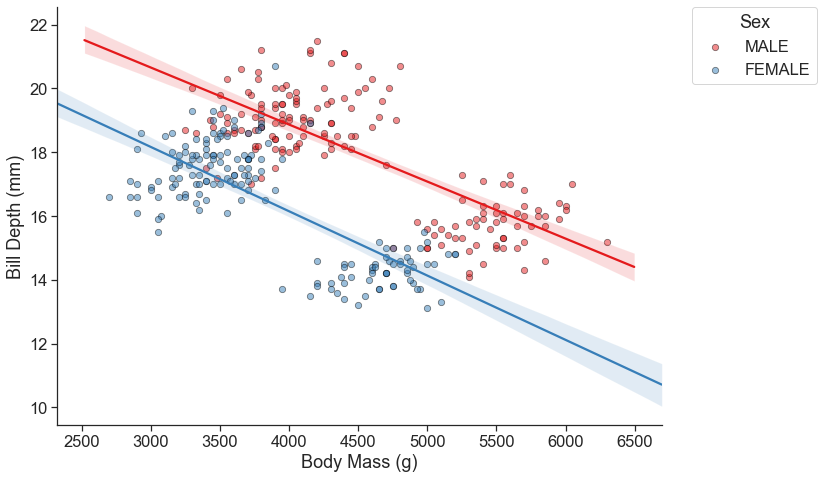

In [36]:

PlotTools.plot_scatter_hue(peng_df["body_mass_g"], # x series
                 peng_df["bill_depth_mm"], # y series, 
                 series_hue=peng_df["sex"],
                 aspect_ratio=1.7, size=7,
                 show_reg_line=True, 
                 x_title='Body Mass (g)', y_title='Bill Depth (mm)', x_rotation=0,
                 hue_legend_title='Sex', xticks=None, font_scale=1.5,
                 sns_style="ticks", legend_frame=True,
                 hue_palette='Set1',
                 marker_size=40, marker_alpha=0.5,
                 marker_linewidth=0.8, marker_edgecolor='black')

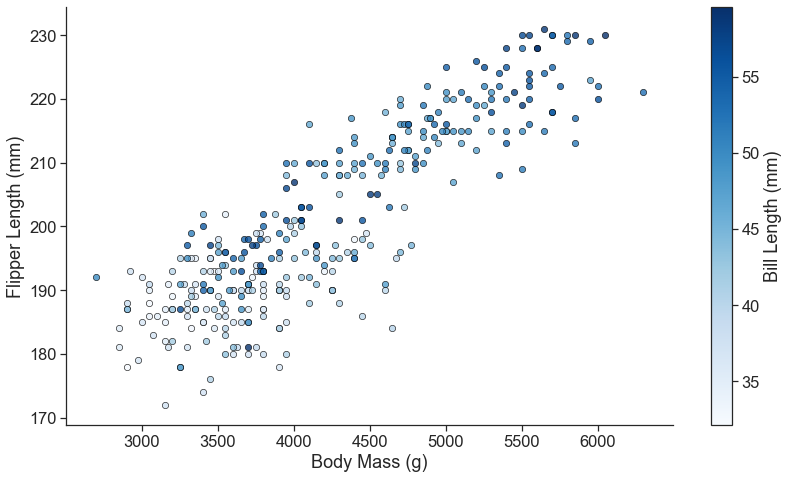

In [37]:
PlotTools.plot_scatter_hue(peng_df["body_mass_g"], # x series
                 peng_df["flipper_length_mm"], # y series, 
                 series_hue=peng_df["bill_length_mm"],
                 aspect_ratio=1.7, size=7,
                 x_title='Body Mass (g)', y_title='Flipper Length (mm)', x_rotation=0,
                 hue_legend_title='Bill Length (mm)', font_scale=1.5,
                 hue_colorscale=True, hue_palette='Blues',
                 marker_size=40,
                 marker_linewidth=0.7, marker_edgecolor='black',
                 marker_alpha=0.8)

# Heatmap

In [38]:
help(PlotTools.plot_heatmap)

Help on function plot_heatmap in module PlotTools:

plot_heatmap(numbersTable, cmap='YlGnBu', figsize=(8, 8), title='', title_fontsize=13, ax=None, font_scale=1, snsStyle='ticks', xRotation=0, yRotation=90, xlabel='', ylabel='', colormap_label='', vmin=None, vmax=None, supress_ticks=True, annotate_text=False, annotate_fontsize=8, annotation_format='.2f', mask=None, colorbar_ticks=None, hide_colorbar=False, xy_labels_fontsize=None, grid_linewidths=0, grid_linecolor='white', color_specific_xticklabels=None, color_specific_yticklabels=None, color_specific_color='red', fix_smaller_rows_at_y_edges_bug=False)
    # former plotHeatmap_real



Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


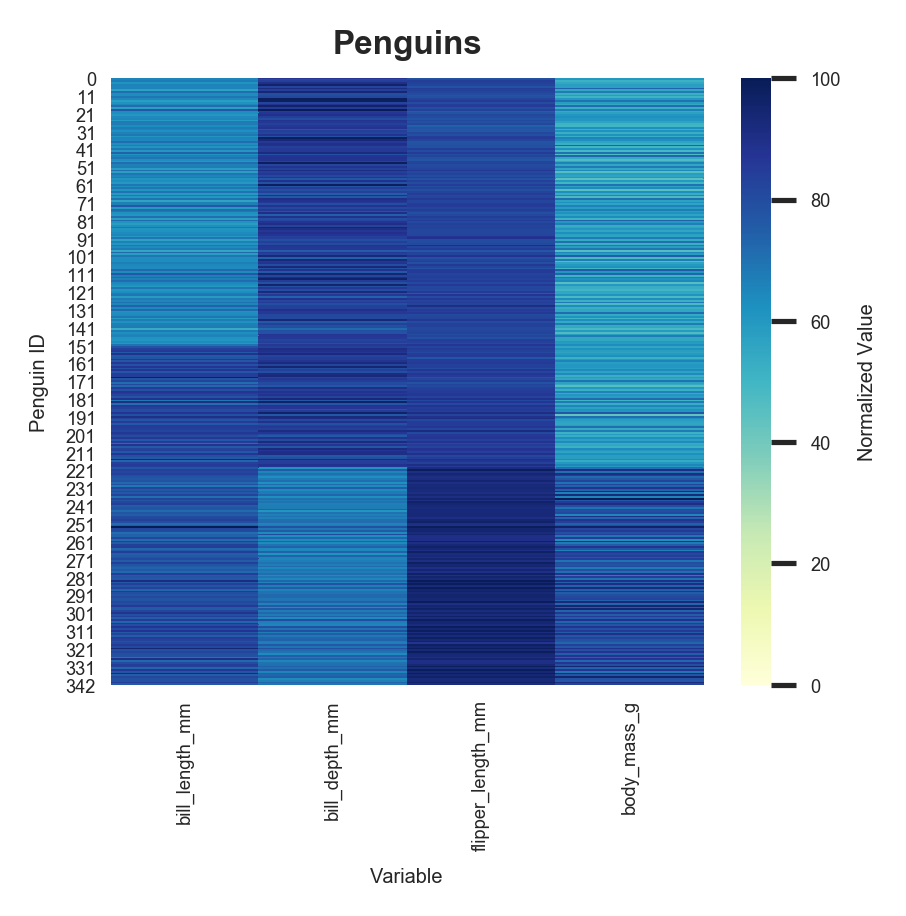

In [39]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
PlotTools.plot_heatmap(100 * peng_df[cols] / peng_df[cols].max(), 
                       cmap='YlGnBu', figsize=(3, 3),
                       title='Penguins', title_fontsize=8, 
                       font_scale=0.4, xRotation=90, yRotation=0,
                       xlabel='Variable', ylabel='Penguin ID', colormap_label='Normalized Value',
                       vmin=0, vmax=None)

Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


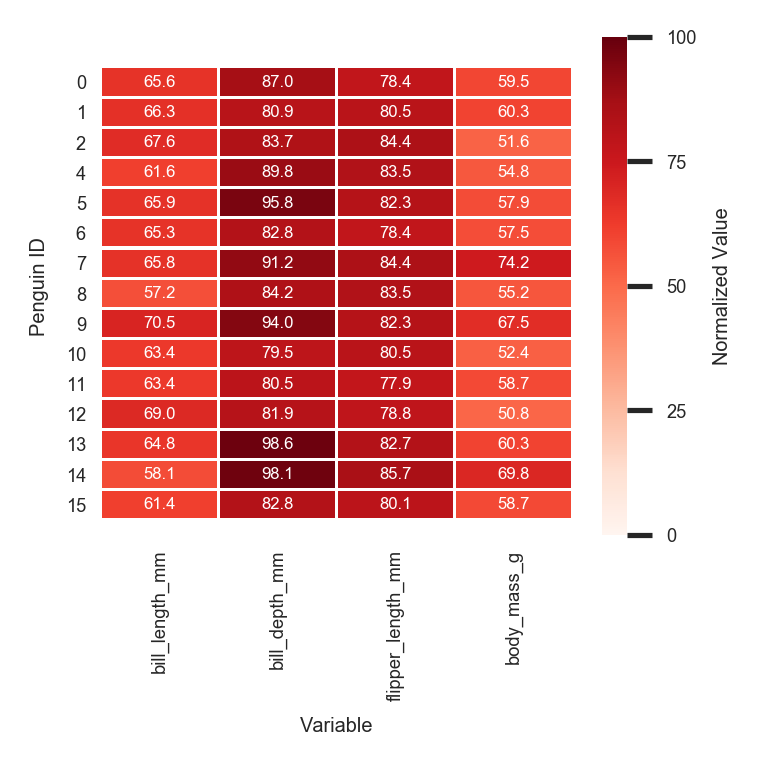

In [40]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
PlotTools.plot_heatmap(100 * (peng_df[cols] / peng_df[cols].max()).iloc[:15], 
                      cmap='Reds', figsize=(2.5, 2.5),
                      font_scale=0.4, xRotation=90, yRotation=0,
                      xlabel='Variable', ylabel='Penguin ID', colormap_label='Normalized Value',
                      vmin=0, vmax=100,
                      annotate_text=True, annotate_fontsize=4,
                      annotation_format=".1f",
                      grid_linewidths=0.5, grid_linecolor='white',
                      colorbar_ticks=[0,25,50,75,100],
                      fix_smaller_rows_at_y_edges_bug=True) # some versions have the first and last rows cut. This flag changed to True solves this

# Clustermap

In [41]:
help(PlotTools.plot_clustermap)

Help on function plot_clustermap in module PlotTools:

plot_clustermap(numbersTable, cmap='YlGnBu', figsize=(8, 8), title='', title_fontsize=13, title_y_padding=0, adjRight=0.8, adjBottom=0.3, adjLeft=None, adjTop=None, row_clustering=True, col_clustering=True, font_scale=1, snsStyle='ticks', vmin=None, vmax=None, xlabel='', ylabel='', xRotation=0, yRotation=0, xy_labels_fontsize=None, mask=None, cbar_title='', cbar_orient='vertical', cbar_pos=None, cbar_vertical_left=False, cbar_vertical_left_x_factor=0.6, cbar_title_fontsize=None, cbar_ticks_fontsize=None, hide_cbar=False, linewidths=0, linecolor='white', row_color_vals=None, row_cmap='Blues', row_vmin=None, row_vmax=None, row_color_labels=None, row_color_lab_legend=True, row_color_lab_legend_loc='lower center', row_color_lab_legend_ncol=4, row_color_labels_cmap='Set1', row_color_labels_cmap_dict=None, row_color_labels_order=None, row_color_legend_frameon=True, col_color_vals=None, col_cmap='Blues', col_vmin=None, col_vmax=None, col_

may be distorted and has to be redefined after the command.


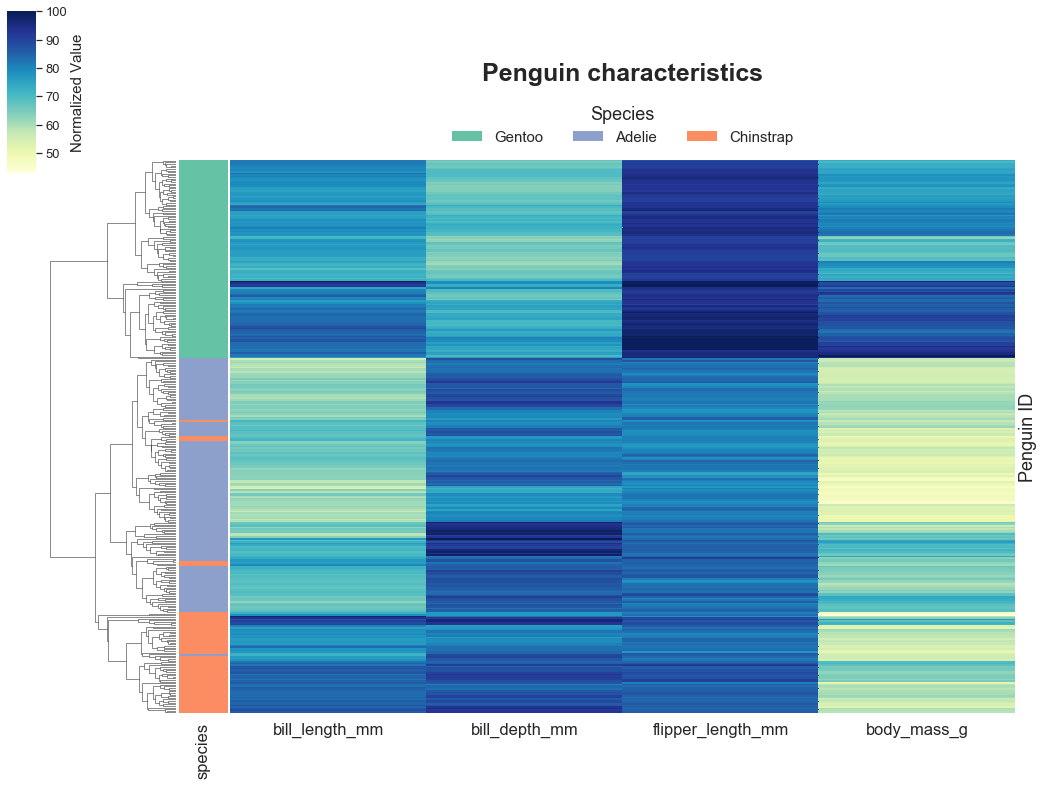

In [42]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
PlotTools.plot_clustermap(100 * (peng_df[cols] / peng_df[cols].max()), 
                        cmap='YlGnBu', figsize=(20, 15),
                        title='Penguin characteristics', title_fontsize=25, 
                        row_clustering=True, col_clustering=False,
                        font_scale=1.5, 
                        xlabel='', ylabel='Penguin ID', xRotation=0, yRotation=0,
                        xy_labels_fontsize=None,
                        
                        vmin=None, vmax=100,
                          
                        cbar_title='Normalized Value', cbar_orient='vertical',
                        cbar_pos=[0.1, 0.8, 0.02, 0.15],
                        cbar_title_fontsize=15, cbar_ticks_fontsize=13,

                        linewidths=0, linecolor='white',

                        row_color_labels=peng_df['species'],
                        row_color_lab_legend=True, row_color_lab_legend_loc='lower center',
                        row_color_lab_legend_ncol=4, row_color_labels_cmap='Set2',
                        row_color_labels_order=['Gentoo', 'Adelie', 'Chinstrap'],
                        row_color_legend_frameon=False,

                        rowcol_color_legend_fontsize=15, rowcol_color_legend_title='Species', 
                        rowcol_color_legend_title_fontsize=18,

                        xticklabels='auto', yticklabels=[],
                        hide_ticks=True,

                        fix_smaller_rows_at_y_edges_bug=False)

may be distorted and has to be redefined after the command.


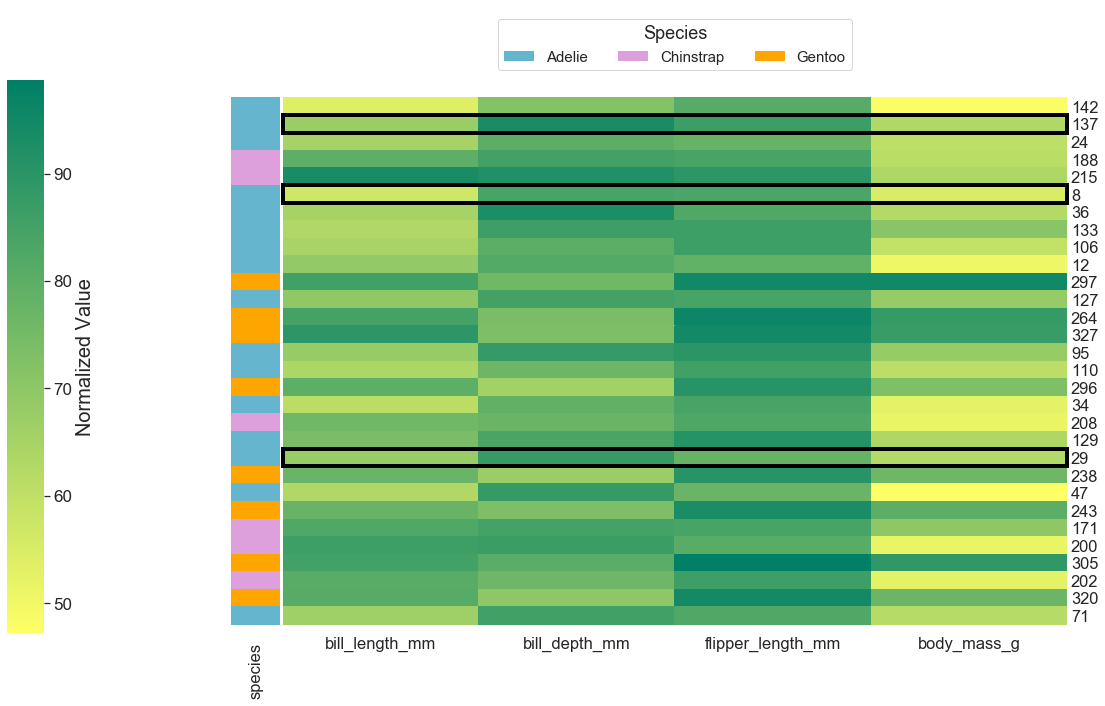

In [43]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
random_subset_df = 100 * (peng_df[cols] / peng_df[cols].max()).sample(n=30)
PlotTools.plot_clustermap(random_subset_df, 
                    cmap='summer_r', figsize=(20, 15),
                    title='', title_fontsize=13, title_y_padding=0,
                    adjRight=0.8, adjBottom=0.3, adjLeft=None, adjTop=None,
                    row_clustering=False, col_clustering=False,
                    font_scale=1.5, 
                    xlabel='', ylabel='', xRotation=0, yRotation=0,
                    xy_labels_fontsize=None,
                    
                    cbar_vertical_left=True, cbar_vertical_left_x_factor=0.1,
                    cbar_title='Normalized Value', cbar_orient='vertical',
                    cbar_pos=[0.1, 0.8, 0.02, 0.15],
                    cbar_title_fontsize=20, cbar_ticks_fontsize=17,

                    linewidths=0, linecolor='white',

                    row_color_labels=peng_df['species'],
                    row_color_lab_legend=True, row_color_lab_legend_loc='lower center',
                    row_color_lab_legend_ncol=4,
                    row_color_labels_cmap_dict={'Gentoo': 'orange', 'Adelie': 'c', 'Chinstrap': 'plum'}, 
                    row_color_legend_frameon=True,

                    rowcol_color_legend_fontsize=15, rowcol_color_legend_title='Species', 
                    rowcol_color_legend_title_fontsize=18,

                    col_names_to_frame=None, row_names_to_frame=list(random_subset_df.index[[1,5, 20]]),
                    names_frame_color='black', names_frame_width=4,

                    xticklabels='auto', yticklabels='auto',
                    hide_ticks=False,

                    fix_smaller_rows_at_y_edges_bug=True)

# Barplot

In [44]:
help(PlotTools.DFbarPlot)

Help on function DFbarPlot in module PlotTools:

DFbarPlot(data, columns=None, figsize=(6, 4), plotTitle='', plotOnaxes=None, xTitle=None, yTitle=None, ylim=None, xRotation=45, width=0.8, legendLabels=None, legendTitle=None, grid=False, showLegend=True, titleFontSize=22, axesTitleFontSize=18, axesTicksFontSize=16, legendFontSize=16, legendTitleFontSize=17, stacked=False, add_value_labels=False, float_num_digits=2, value_labels_fontsize=12, value_labels_rotation=0, savePath=None, color_list=None)



D:\Liel\Dropbox\PyCharm\PycharmProjectsNew\LielTools_4\LielTools\PlotTools.py:1085: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  xticksText = plt.axes().get_xticklabels()
D:\Liel\Dropbox\PyCharm\PycharmProjectsNew\LielTools_4\LielTools\PlotTools.py:1087: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(xticksText)
D:\Liel\Dropbox\PyCharm\PycharmProjectsNew\LielTools_4\LielTools\PlotTools.py:1093: Matplot

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

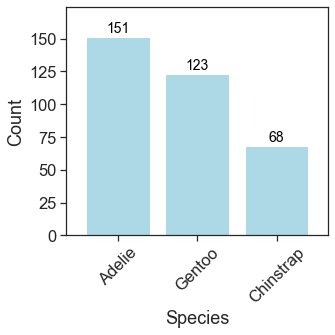

In [45]:
PlotTools.DFbarPlot(peng_df['species'].value_counts(), 
              figsize=(5, 5),
              xTitle='Species', yTitle='Count',
              ylim=None, xRotation=45,
              width=0.8,
              showLegend=False,
              axesTitleFontSize=18, 
              add_value_labels=True, float_num_digits=0,
              value_labels_fontsize=14, value_labels_rotation=0,
              color_list=['lightblue'])

D:\Liel\Dropbox\PyCharm\PycharmProjectsNew\LielTools_4\LielTools\PlotTools.py:1075: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().legend_.remove()
D:\Liel\Dropbox\PyCharm\PycharmProjectsNew\LielTools_4\LielTools\PlotTools.py:1078: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  legText = plt.axes().get_legend().get_texts()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

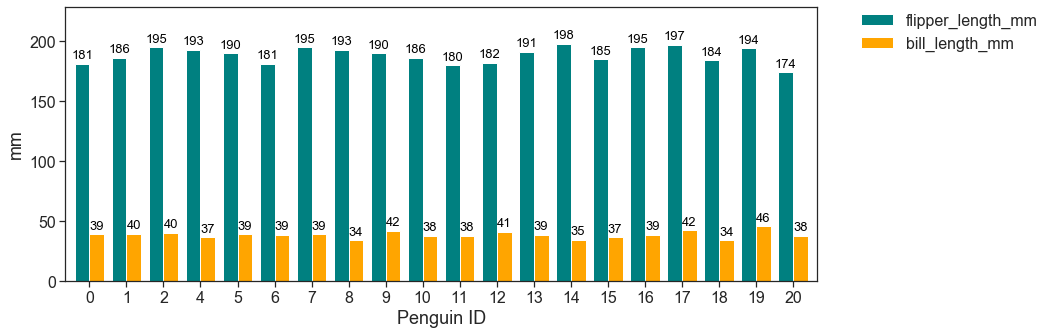

In [46]:
PlotTools.DFbarPlot(peng_df.head(20), columns=['flipper_length_mm', 'bill_length_mm'],
              figsize=(15, 5),
              xTitle='Penguin ID', yTitle='mm',
              ylim=None, xRotation=0,
              width=0.8,
              showLegend=True,
              axesTitleFontSize=18, axesTicksFontSize=16,
              legendFontSize=16, legendTitleFontSize=17,
              add_value_labels=True, float_num_digits=0,
              value_labels_fontsize=13, value_labels_rotation=0,
              color_list=['teal', 'orange']
              )